## K-Means clustering on cluster data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("cluster_data.csv")
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
2295,-229.000000,-504.000000
2296,392.000000,-580.000000
2297,134.000000,525.000000
2298,469.000000,-535.000000


In [4]:
df.isna().sum()

0    0
1    0
dtype: int64

In [5]:
df.describe()

,0,1
count,2300.000000,2300.000000
mean,-26.831712,-24.626332
std,291.911852,291.026822
min,-597.000000,-612.225217
25%,-266.074324,-263.291755
50%,-33.224781,-25.293986
75%,211.542143,216.016792
max,594.000000,593.000000


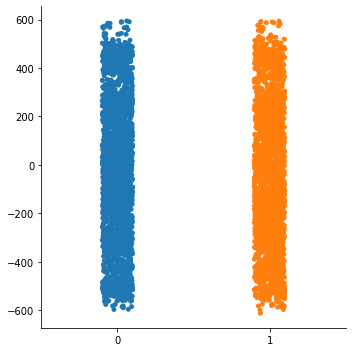

In [7]:
sns.catplot(data=df)

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

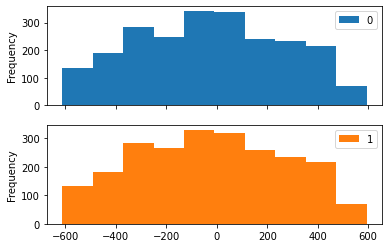

In [8]:
df.plot(kind="hist",subplots=True)

In [9]:
X=df

### Elbow Method
Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

In [10]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

([<matplotlib.axis.XTick at 0x1e15bb55d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

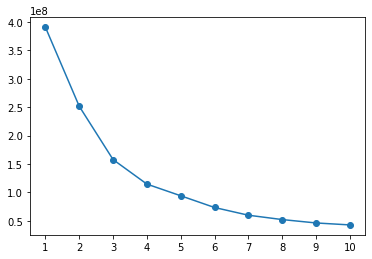

In [11]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)


To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 6.

In [12]:
model=KMeans(n_clusters=6)
model.fit(X)

KMeans(n_clusters=6)

In [13]:
model.labels_

array([1, 1, 1, ..., 2, 3, 2])

In [14]:
model.n_iter_

14

In [15]:
model.cluster_centers_

array([[ -27.48701448,  -33.68489084],
       [ 329.06918828,  183.99112569],
       [-106.0687125 ,  360.86723068],
       [ 251.17460555, -306.95285346],
       [-245.98583441, -369.52235789],
       [-413.37884614,   60.37094926]])

In [16]:
data=df
data["Final Label"]=model.labels_
data

,0,1,Final Label
0,484.891555,-31.006357,1
1,489.391178,21.973916,1
2,462.886575,-27.599889,1
3,517.218479,5.588090,1
4,455.669049,1.982181,1
...,...,...,...
2295,-229.000000,-504.000000,4
2296,392.000000,-580.000000,3
2297,134.000000,525.000000,2
2298,469.000000,-535.000000,3


### Selecting only two features for model for visualization of Clusters


In [17]:
X=df[["0","1"]]

In [18]:
X.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


### Elbow method to get optimal number of k on new data¶

In [19]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

([<matplotlib.axis.XTick at 0x1e15fc3e700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

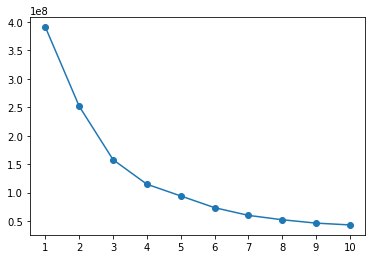

In [20]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)


To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [21]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [22]:
model.cluster_centers_

array([[ 268.39343702, -275.6660623 ],
       [-296.72350819,  245.32283488],
       [ -31.41201348,  -37.10591625],
       [ 245.18776462,  264.71747158],
       [-291.18519551, -315.02960585]])

In [23]:
model.labels_

array([0, 3, 0, ..., 3, 0, 3])

In [24]:
model.n_iter_

19

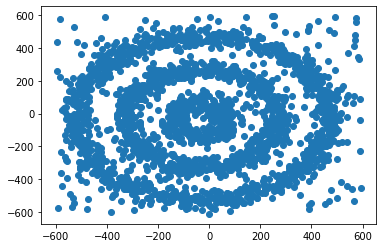

In [25]:
plt.scatter(df["0"],df["1"])

In [26]:
centroid=model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

[ 268.39343702 -275.6660623 ]
[-296.72350819  245.32283488]
[-31.41201348 -37.10591625]
[245.18776462 264.71747158]
[-291.18519551 -315.02960585]


(5, 2)

### Cluster Visualization

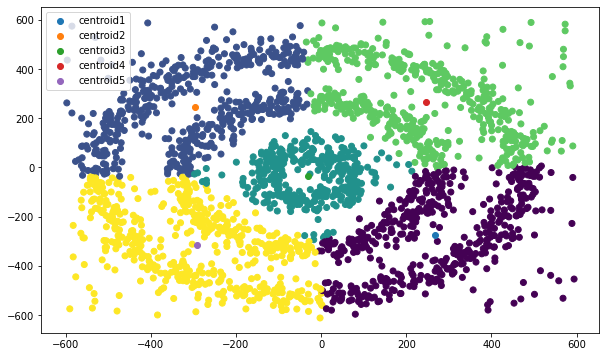

In [27]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df["0"],df["1"],c=model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))

plt.legend()